# Collect the codes in [RDKit Cookook](https://www.rdkit.org/docs/Cookbook.html)

安装完rdkit后，本笔记本的每一部分都可以独立运行,可以直接从目录跳到你感兴趣的地方。

（Every Chapter of this notebook can run individually, You Can jump to your interests）

In [162]:
# Install rdkit 2020.09.1 on Colab. 
# If you have been installED rdkit, just ignore this Cell.
!pip install kora -q
import kora.install.rdkit

# 1.画分子（Drawing Molecules）
**Author**: Takayuki Serizawa

**Original Source**: https://iwatobipen.wordpress.com/2017/02/25/draw-molecule-with-atom-index-in-rdkit/

**Index ID#**: RDKitCB_0

**Summary**: Draw a molecule with atom index numbers.

In [ ]:
# Import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True # Ture(SVG) is more clear than False(PNG)

In [ ]:
# Define a function to show atom_index
def mol_with_atom_index(mol):
  for atom in mol.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
  return mol

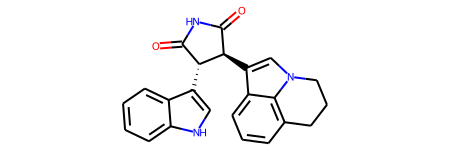

In [ ]:
# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
# Default
mol

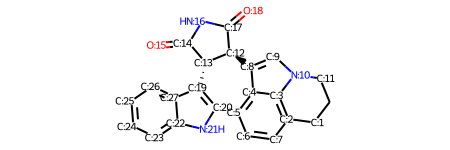

In [ ]:
# With atom index
mol_with_atom_index(mol)

**A simpler way to add atom indices is** to adjust the IPythonConsole properties. This produces a similar image to the example above, the difference being that the atom indices are now near the atom, rather than at the atom position.

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.ipython_useSVG=True
IPythonConsole.molSize = 300, 300

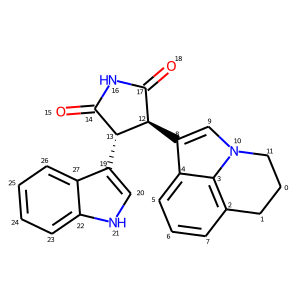

In [ ]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")
mol

## 1.1.引入电荷计算（Include a Calculation）
**Author**: Greg Landrum

**Original Source**: https://sourceforge.net/p/rdkit/mailman/message/36457619/

**Index ID#**: RDKitCB_23

**Summary**: Draw a molecule with a calculation value displayed (e.g., Gasteiger Charge)

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 200,200

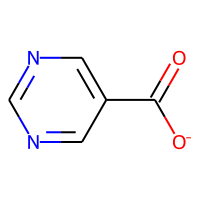

In [ ]:
m = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')
m

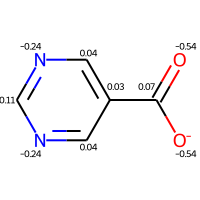

In [ ]:
# show GasteigerCharges of each atom
AllChem.ComputeGasteigerCharges(m)
m2 = Chem.Mol(m)
for at in m2.GetAtoms():
  lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
  at.SetProp('atomNote',lbl)
m2

## 1.2.引入立体标注（Include Stereo Annotations）
**Author**: Greg Landrum

**Source**: https://github.com/rdkit/UGM_2020/blob/master/Notebooks/Landrum_WhatsNew.ipynb

**Index ID#**: RDKitCB_32

**Summary**: Draw a molecule with stereochemistry annotations displayed.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.ipython_useSVG = True
IPythonConsole.drawOptions.addStereoAnnotation = True

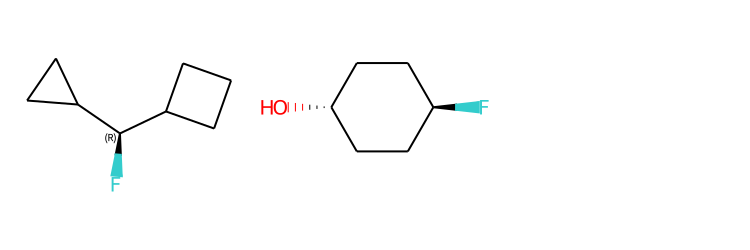

In [ ]:
# Default Representation uses legacy FindMolChiralCenters() code
m1 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m2 = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

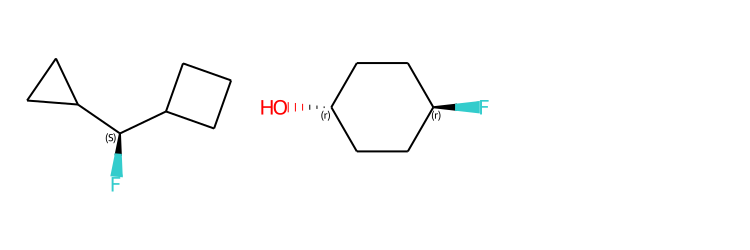

In [ ]:
# new stereochemistry code with more accurate CIP labels, 2020.09 release
from rdkit.Chem import rdCIPLabeler
rdCIPLabeler.AssignCIPLabels(m1)
rdCIPLabeler.AssignCIPLabels(m2)
Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

## 1.3.黑白化分子（Black and White Molecules）
**Author**: Greg Landrum

**Source**: https://gist.github.com/greglandrum/d85d5693e57c306e30057ec4d4d11342

**Index ID#**: RDKitCB_1

**Summary**: Draw a molecule in black and white.

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG = True

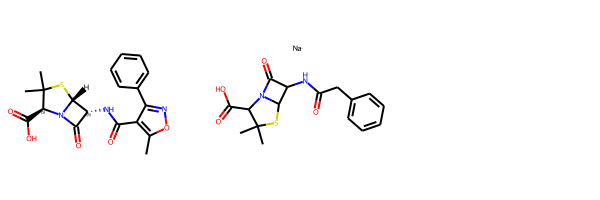

In [ ]:
ms = [Chem.MolFromSmiles(x) for x in ('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12','CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')]
Draw.MolsToGridImage(ms)

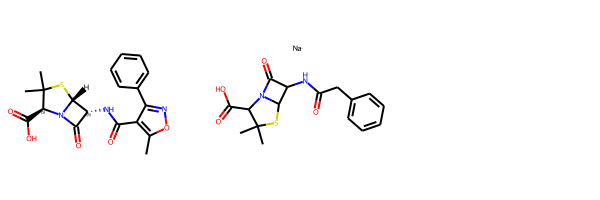

In [ ]:
IPythonConsole.drawOptions.useBWAtomPalette
Draw.MolsToGridImage(ms)

## 1.4.高亮分子的子结构（Highlight a Substructure in a Molecule）

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [ ]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


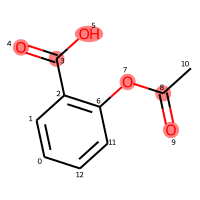

In [ ]:
m

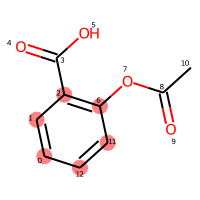

In [ ]:
# you can also manually set the atoms that should be highlighted:
m.__sssAtoms = [0,1,2,6,11,12]
m

## 1.5.高亮分子的不同之处（Highlight Molecule Differences）
**Author**: Takayuki Serizawa

**Original Source**: https://gist.github.com/iwatobipen/6d8708d8c77c615cfffbb89409be730d

**Index ID#**: RDKitCB_36

**Summary**: Highlight molecule differences based on maximum common substructure

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.drawOptions.minFontSize = 12
IPythonConsole.drawOptions.addAtomIndices = False #不显示atomIndices
IPythonConsole.drawOptions.useDefaultAtomPalette() #把前面的黑白化变回默认颜色

In [ ]:
mol1 = Chem.MolFromSmiles('FC1=CC=C2C(=C1)C=NN2')
mol2 = Chem.MolFromSmiles('CCC1=C2NN=CC2=CC(Cl)=C1')

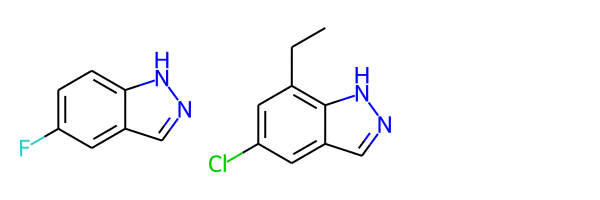

In [ ]:
Draw.MolsToGridImage([mol1, mol2])

In [ ]:
def view_difference(mol1, mol2):
  mcs = rdFMCS.FindMCS([mol1,mol2])
  mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
  match1 = mol1.GetSubstructMatch(mcs_mol)
  target_atm1 = []
  for atom in mol1.GetAtoms():
    if atom.GetIdx() not in match1:
      target_atm1.append(atom.GetIdx())
  match2 = mol2.GetSubstructMatch(mcs_mol)
  target_atm2 = []
  for atom in mol2.GetAtoms():
    if atom.GetIdx() not in match2:
      target_atm2.append(atom.GetIdx())
  return Draw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])

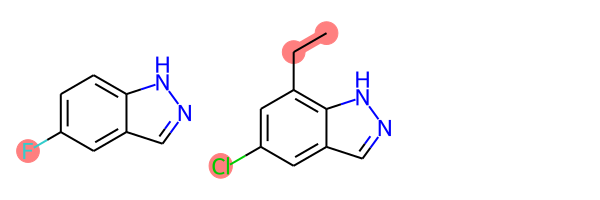

In [ ]:
view_difference(mol1, mol2)

## 1.6.不显示隐式氢原子（Without Implicit Hydrogens）
**Author**: Greg Landrum

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36746387/ and https://gist.github.com/greglandrum/9283aeadfb66d0fe8a2900e63fb10f3e

**Index ID#**: RDKitCB_17

**Summary**: Draw a molecule without implicit hydrogens

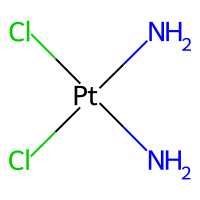

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
m = Chem.MolFromSmiles('[Pt](Cl)(Cl)(N)N')
m

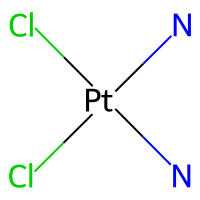

In [ ]:
for atom in m.GetAtoms():
  atom.SetProp("atomLabel", atom.GetSymbol())
m

## 1.7.显示官能团缩写 （With Abbreviations）
**Author**: Greg Landrum

**Source**: https://github.com/rdkit/UGM_2020/blob/master/Notebooks/Landrum_WhatsNew.ipynb

**Index ID#**: RDKitCB_34

**Summary**: Draw a molecule with functional group abbreviations

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdAbbreviations

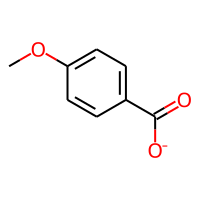

In [ ]:
m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m

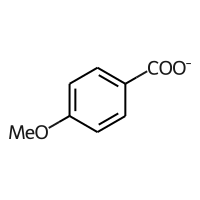

In [ ]:
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs)
nm

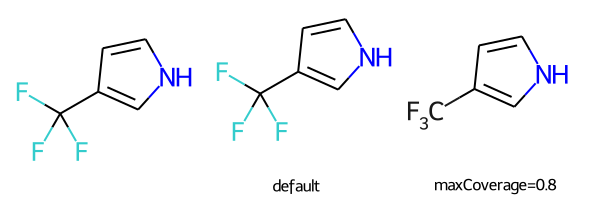

In [ ]:
# abbreviations that cover more than 40% of the molecule won't be applied by default
m = Chem.MolFromSmiles('c1c[nH]cc1C(F)(F)F')
nm1 = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs)
nm2 = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs,maxCoverage=0.8)
Draw.MolsToGridImage((m,nm1,nm2),legends=('','default','maxCoverage=0.8'))

In [ ]:
# See available abbreviations
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
for a in abbrevs:
  print(a.label, end=",")

CO2Et,COOEt,OiBu,nDec,nNon,nOct,nHept,nHex,nPent,iPent,tBu,iBu,nBu,iPr,nPr,Et,NCF3,CF3,CCl3,CN,NC,N(OH)CH3,NO2,NO,SO3H,CO2H,COOH,OEt,OAc,NHAc,Ac,CHO,NMe,SMe,OMe,CO2-,COO-,

## 1.8.Using CoordGen Library
**Author**: Greg Landrum

**Source**: https://github.com/rdkit/UGM_2020/blob/master/Notebooks/Landrum_WhatsNew.ipynb

**Index ID#**: RDKitCB_37

**Summary**: Draw a molecule using CoordGen Library

Some molecules like **macrocycles** are not represented well using the default RDKit drawing code. As a result, it may be preferable to use the CoordGen integration.

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 350,300
from rdkit.Chem import Draw

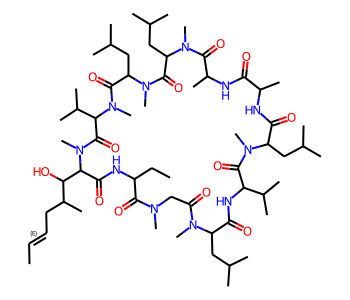

In [ ]:
# default drawing （It was like a circle before, but now.. same）
mol = Chem.MolFromSmiles("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
mol

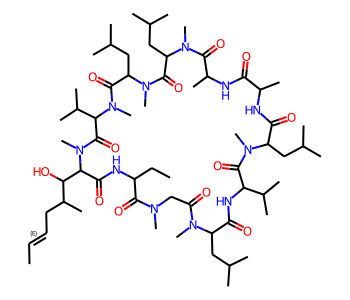

In [ ]:
# with CoordGen
from rdkit.Chem import rdCoordGen
rdCoordGen.AddCoords(mol)
mol

It is also possible to use CoordGen with the MolDraw2D class. Here is one way to do that:

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

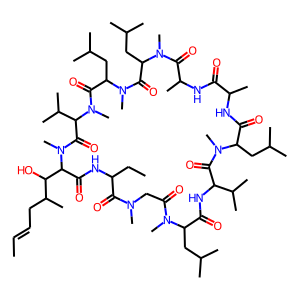

In [ ]:
mol = Chem.MolFromSmiles("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
drawer = rdMolDraw2D.MolDraw2DSVG(300,300)
drawer.drawOptions().addStereoAnnotation = False
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
SVG(drawer.GetDrawingText())

Well, I can't find some difference in this example.

## 1.9.在matplotlib Plot上画分子

**Author**: Takayuki Serizawa

**Original Source**: https://gist.github.com/iwatobipen/1b384d145024663151b3252bf16d2aa8

**Index ID#**: RDKitCB_35

**Summary**: Draw a molecule on a matplotlib plot.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [ ]:
x = np.arange(0, 180, 1)
y = np.sin(x)

In [ ]:
mol = Chem.MolFromSmiles('C1CNCCC1C(=O)C')
im = Chem.Draw.MolToImage(mol)

(-0.5, 299.5, 299.5, -0.5)

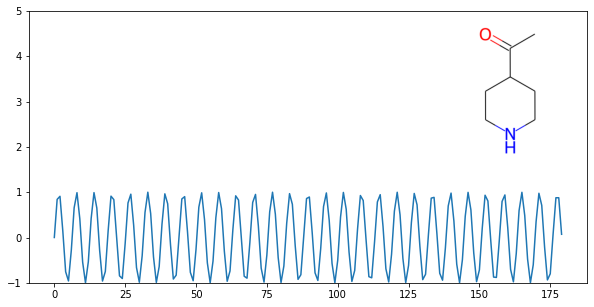

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.ylim(-1, 5)
ax = plt.axes([0.6, 0.47, 0.38, 0.38], frameon=True)
ax.imshow(im)
ax.axis('off') # you can try ax.axis('on')
# plt.show() # commented out to avoid creating plot with doctest

# 2.键 Bonds and Boding


## 2.1获得原子的杂化类型和数量Hybridization Type and Count¶
**Author**: Jean-Marc Nuzillard and Andrew Dalke

**Source**: https://sourceforge.net/p/rdkit/mailman/message/37021222/ and https://sourceforge.net/p/rdkit/mailman/message/37025886/

**Index ID#**: RDKitCB_26

**Summary**: Get hybridization type and count

In [ ]:
from rdkit import Chem
m = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
for x in m.GetAtoms():
  print(x.GetIdx(), x.GetHybridization(), end=', ')

0 SP3, 1 SP2, 2 SP2, 3 SP2, 4 SP2, 5 SP2, 6 SP2, 7 SP2, 8 SP2, 9 SP2, 10 SP2, 11 SP2, 12 SP3, 13 SP3, 

In [ ]:
# if you want to count hybridization type (e.g., SP3):
from rdkit import Chem
m = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
print(sum((x.GetHybridization() == Chem.HybridizationType.SP3) for x in m.GetAtoms()))

3


# 3.环，芳香性，苯环Rings, Aromaticity, and Kekulization

## 3.1.数分子中的环 Count Ring Systems

**Author**: Greg Landrum

**Source**: https://gist.github.com/greglandrum/de1751a42b3cae54011041dd67ae7415

**Index ID#**: RDKitCB_3

**Summary**: Count ring systems in a molecule

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 200, 200

In [ ]:
def GetRingSystems(mol, includeSpiro=False):
  ri = mol.GetRingInfo()
  systems = []
  for ring in ri.AtomRings():
    ringAts = set(ring)
    nSystems = []
    for system in systems:
      nInCommon = len(ringAts.intersection(system))
      if nInCommon and (includeSpiro or nInCommon>1):
        ringAts = ringAts.union(system)
      else:
        nSystems.append(system)
    nSystems.append(ringAts)
    systems = nSystems
  return systems
mol = Chem.MolFromSmiles('CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3')
print(GetRingSystems(mol))

[{1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12}, {14, 15, 16, 17, 18, 19}]


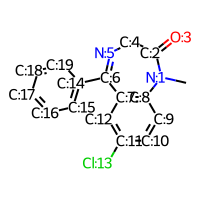

In [ ]:
# Draw molecule with atom index (see RDKitCB_0)
def mol_with_atom_index(mol):
  for atom in mol.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
  return mol
mol_with_atom_index(mol)

## 3.2.识别分子中的环和芳香环 Identify Aromatic Rings¶
**Author**: Benjamin Datko and Greg Landrum

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36860045/ and https://sourceforge.net/p/rdkit/mailman/message/23801106/

**Index ID#**: RDKitCB_8

**Summary**: Identify which rings are aromatic in a molecule

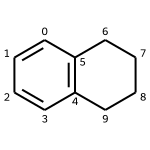

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 150,150
IPythonConsole.drawOptions.addAtomIndices = True

m = Chem.MolFromSmiles('c1cccc2c1CCCC2')
m

In [ ]:
ri = m.GetRingInfo()
# You can interrogate the RingInfo object to tell you the atoms that make up each ring:
print(ri.AtomRings())

((0, 5, 4, 3, 2, 1), (6, 7, 8, 9, 4, 5))


In [ ]:
# or the bonds that make up each ring:
print(ri.BondRings())

((9, 4, 3, 2, 1, 0), (6, 7, 8, 10, 4, 5))


In [ ]:
# To detect aromatic rings, I would loop over the bonds in each ring and
# flag the ring as aromatic if all bonds are aromatic:
def isRingAromatic(mol, bondRing):
  for id in bondRing:
    if not mol.GetBondWithIdx(id).GetIsAromatic():
      return False
  return True

In [ ]:
print(isRingAromatic(m, ri.BondRings()[0]))

True


In [ ]:
print(isRingAromatic(m, ri.BondRings()[1]))

False


## 3.3.使用SMARTS来区分芳香碳和烯烃碳 Identify Aromatic Atoms¶
**Author**: Paolo Tosco

**Original Source**: https://sourceforge.net/p/rdkit/mailman/message/36862879/

**Index ID#**: RDKitCB_9

**Summary**: Differentiate aromatic carbon from olefinic carbon with SMARTS

((0,), (1,), (2,), (3,), (4,), (5,))


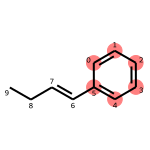

In [ ]:
from rdkit import Chem
mol = Chem.MolFromSmiles("c1ccccc1C=CCC")
aromatic_carbon = Chem.MolFromSmarts("c")
print(mol.GetSubstructMatches(aromatic_carbon))
mol

In [ ]:
# The RDKit includes a SMARTS extension that allows hybridization queries,
# here we query for SP2 aliphatic carbons:
olefinic_carbon = Chem.MolFromSmarts("[C^2]")
print(mol.GetSubstructMatches(olefinic_carbon))

((6,), (7,))


There is also an alternative, more efficient approach, using the rdqueries module:

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdqueries

In [ ]:
# 芳香碳原子
mol = Chem.MolFromSmiles("c1ccccc1C=CCC")
q = rdqueries.IsAromaticQueryAtom()
print([x.GetIdx() for x in mol.GetAtomsMatchingQuery(q)])

[0, 1, 2, 3, 4, 5]


In [ ]:
# sp2杂化的原子
q = rdqueries.HybridizationEqualsQueryAtom(Chem.HybridizationType.SP2)
print([x.GetIdx() for x in mol.GetAtomsMatchingQuery(q)])

[0, 1, 2, 3, 4, 5, 6, 7]


In [ ]:
# 烯烃碳原子
qcombined = rdqueries.IsAliphaticQueryAtom()
qcombined.ExpandQuery(q)
print([x.GetIdx() for x in mol.GetAtomsMatchingQuery(qcombined)])

[6, 7]


# 4.立体化学 Stereochemistry

## 4.1.寻找手性中心和双键的立体化学  Identifying Stereochemistry

**Author**: Vincent Scalfani

**Source**: https://github.com/rdkit/UGM_2020/blob/master/Notebooks/Landrum_WhatsNew.ipynb

**Index ID#**: RDKitCB_30

**Summary**: Find chiral centers and double bond stereochemistry.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = False
IPythonConsole.molSize = 200,200

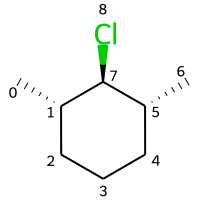

In [ ]:
m = Chem.MolFromSmiles("C[C@H]1CCC[C@@H](C)[C@@H]1Cl")
m

In [ ]:
# legacy FindMolChiralCenters()
print(Chem.FindMolChiralCenters(m,force=True,includeUnassigned=True,useLegacyImplementation=True))

[(1, 'S'), (5, 'R'), (7, 'R')]


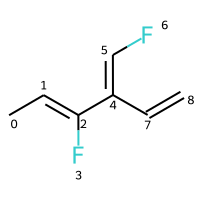

In [ ]:
# Identifying Double Bond Stereochemistry
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addBondIndices = False
IPythonConsole.molSize = 200,200
mol = Chem.MolFromSmiles("C\C=C(/F)\C(=C\F)\C=C")
mol

In [ ]:
# Using GetStereo()
for b in mol.GetBonds():
  print(b.GetBeginAtomIdx(),b.GetEndAtomIdx(),
      b.GetBondType(),b.GetStereo())

0 1 SINGLE STEREONONE
1 2 DOUBLE STEREOZ
2 3 SINGLE STEREONONE
2 4 SINGLE STEREONONE
4 5 DOUBLE STEREOE
5 6 SINGLE STEREONONE
4 7 SINGLE STEREONONE
7 8 DOUBLE STEREONONE


In [ ]:
# Double bond configuration can also be identified with new
# stereochemistry code using Chem.FindPotentialStereo()
si = Chem.FindPotentialStereo(mol)
for element in si:
    print(f'  Type: {element.type}, Which: {element.centeredOn}, Specified: {element.specified}, Descriptor: {element.descriptor} ')

  Type: Bond_Double, Which: 1, Specified: Specified, Descriptor: Bond_Cis 
  Type: Bond_Double, Which: 4, Specified: Specified, Descriptor: Bond_Trans 


# 5.处理分子 Manipulating Molecules

## 5.1.创建分子片段 Create Fragments
**Author**: Paulo Tosco

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36895168/ and https://gist.github.com/ptosco/3fb93b7c09dac15b6d355eb0ad29f532

**Index ID#**: RDKitCB_7

Summary**: Create fragments of molecules on bonds

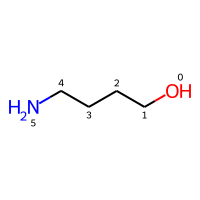

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 200,200

# I have put explicit bonds in the SMILES definition to facilitate comprehension:
mol = Chem.MolFromSmiles("O-C-C-C-C-N")
mol1 = Chem.Mol(mol)
mol2 = Chem.Mol(mol)
mol1

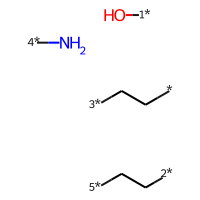

In [ ]:
# Chem.FragmentOnBonds() will fragment all specified bond indices at once, and return a single molecule
# with all specified cuts applied. By default, addDummies=True, so empty valences are filled with dummy atoms:
IPythonConsole.drawOptions.addAtomIndices = False
mol1_f = Chem.FragmentOnBonds(mol1, (0, 2, 4)) #这三个位置切三刀
mol1_f

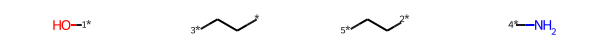

In [ ]:
# This molecule can be split into individual fragments using Chem.GetMolFrags():
MolsToGridImage(Chem.GetMolFrags(mol1_f, asMols=True),molsPerRow= 4, subImgSize=(150,50))

In [ ]:
# Chem.FragmentOnSomeBonds() will fragment according to all permutations of numToBreak bonds at a time
# (numToBreak defaults to 1), and return tuple of molecules with numToBreak cuts applied. By default,
# addDummies=True, so empty valences are filled with dummy atoms:
mol2_f_tuple = Chem.FragmentOnSomeBonds(mol2, (0, 2, 4))

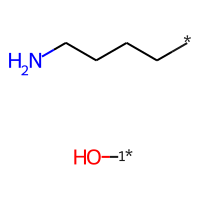

In [ ]:
mol2_f_tuple[0]

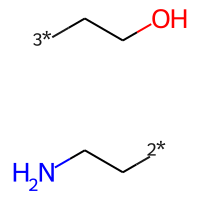

In [ ]:
mol2_f_tuple[1]

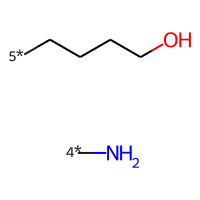

In [ ]:
mol2_f_tuple[2]

In [ ]:
# AttributeError: __enter__
'''
# Finally, you can manually cut bonds using Chem.RWMol.RemoveBonds:
with Chem.RWMol(mol) as rwmol:
  for b_idx in [0, 2, 4]:
    b = rwmol.GetBondWithIdx(b_idx)
    rwmol.RemoveBond(b.GetBeginAtomIdx(), b.GetEndAtomIdx())
# And then call Chem.GetMolFrags() to get sanitized fragments where empty valences were filled with implicit hydrogens:
MolsToGridImage(Chem.GetMolFrags(rwmol, asMols=True))
'''

'\n# Finally, you can manually cut bonds using Chem.RWMol.RemoveBonds:\nwith Chem.RWMol(mol) as rwmol:\n  for b_idx in [0, 2, 4]:\n    b = rwmol.GetBondWithIdx(b_idx)\n    rwmol.RemoveBond(b.GetBeginAtomIdx(), b.GetEndAtomIdx())\n# And then call Chem.GetMolFrags() to get sanitized fragments where empty valences were filled with implicit hydrogens:\nMolsToGridImage(Chem.GetMolFrags(rwmol, asMols=True))\n'

## 5.2.选择分子中最大的片段 Largest Fragment
**Author**: Andrew Dalke and Susan Leung

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36355644/ and https://github.com/susanhleung/rdkit/blob/dev/GSOC2018_MolVS_Integration/rdkit/Chem/MolStandardize/tutorial/MolStandardize.ipynb

**Index ID#**: RDKitCB_31

**Summary**: Select largest fragment from a molecule

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdmolops
mol = Chem.MolFromSmiles('CCOC(=O)C(C)(C)OC1=CC=C(C=C1)Cl.CO.C1=CC(=CC=C1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCC2=CN=C3C(=N2)C(=O)NC(=N3)N')

In [ ]:
mol_frags = rdmolops.GetMolFrags(mol, asMols = True)
largest_mol = max(mol_frags, default=mol, key=lambda m: m.GetNumAtoms())
print(Chem.MolToSmiles(largest_mol))

Nc1nc2ncc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O)cc3)nc2c(=O)[nH]1


The same result can also be achieved with MolStandardize:

In [ ]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
mol = Chem.MolFromSmiles('CCOC(=O)C(C)(C)OC1=CC=C(C=C1)Cl.CO.C1=CC(=CC=C1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCC2=CN=C3C(=N2)C(=O)NC(=N3)N')

In [ ]:
# setup standardization module
largest_Fragment = rdMolStandardize.LargestFragmentChooser()
largest_mol = largest_Fragment.choose(mol)
print(Chem.MolToSmiles(largest_mol))

Nc1nc2ncc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O)cc3)nc2c(=O)[nH]1


## 5.3.在一个母核上取代支链，并枚举组合  Sidechain-Core Enumeration
**Author**: Chris Earnshaw, Stephen Roughley, Greg Landrum (Vincent Scalfani added loop example)

**Source**: https://sourceforge.net/p/rdkit/mailman/message/35730514/ and https://www.rdkit.org/docs/source/rdkit.Chem.rdChemReactions.html

**Index ID#**: RDKitCB_29

**Summary**: Replace sidechains on a core and enumerate the combinations.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

In [ ]:
# core is '*c1c(C)cccc1(O)'
# chain is 'CN*'

rxn = AllChem.ReactionFromSmarts('[c:1][#0].[#0][*:2]>>[c:1]-[*:2]')
reacts = (Chem.MolFromSmiles('*c1c(C)cccc1(O)'),Chem.MolFromSmiles('CN*'))
products = rxn.RunReactants(reacts) # tuple
print(len(products))

1


In [ ]:
print(len(products[0]))

1


In [ ]:
print(Chem.MolToSmiles(products[0][0])) # [0][0] to index out the rdchem mol object

CNc1c(C)cccc1O


In [ ]:
# The above reaction-based approach is flexible, however if you can generate your
# sidechains in such a way that the atom you want to attach to the core
# is the first one (atom zero), there's a somewhat easier way to do this
# kind of simple replacement:

core = Chem.MolFromSmiles('*c1c(C)cccc1(O)')
chain = Chem.MolFromSmiles('NC')
products = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),chain) # tuple
print(Chem.MolToSmiles(products[0]))

CNc1c(C)cccc1O


In [ ]:
# Here is an example in a loop for an imidazolium core with alkyl chains

core = Chem.MolFromSmiles('*[n+]1cc[nH]c1')
chains = ['C','CC','CCC','CCCC','CCCCC','CCCCCC']
chainMols = [Chem.MolFromSmiles(chain) for chain in chains]

product_smi = []
for chainMol in chainMols:
  product_mol = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),chainMol)
  product_smi.append(Chem.MolToSmiles(product_mol[0]))
print(product_smi)

['C[n+]1cc[nH]c1', 'CC[n+]1cc[nH]c1', 'CCC[n+]1cc[nH]c1', 'CCCC[n+]1cc[nH]c1', 'CCCCC[n+]1cc[nH]c1', 'CCCCCC[n+]1cc[nH]c1']


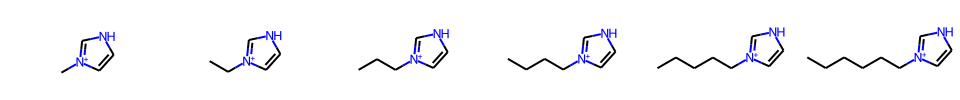

In [ ]:
# View the enumerated molecules:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi],molsPerRow=6, subImgSize=(160,100))

## 5.4.中性化分子

# 6.子结构匹配 Substructure Matching


## 6.1.使用SMARTS查询官能团 Functional Group with SMARTS queries
**Author**: Paulo Tosco

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36810326/

**Index ID#**: RDKitCB_10

**Summary**: Match a functional group (e.g., alcohol) with a SMARTS query

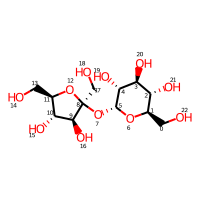

In [168]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.ipython_useSVG = True

sucrose = "C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@]2([C@H]([C@@H]([C@H](O2)CO)O)O)CO)O)O)O)O"
sucrose_mol = Chem.MolFromSmiles(sucrose)
sucrose_mol

In [166]:
# 伯醇的位置
primary_alcohol = Chem.MolFromSmarts("[CH2][OH1]")
print(sucrose_mol.GetSubstructMatches(primary_alcohol))

((0, 22), (13, 14), (17, 18))


In [169]:
# 仲醇的位置
secondary_alcohol = Chem.MolFromSmarts("[CH1][OH1]")
print(sucrose_mol.GetSubstructMatches(secondary_alcohol))

((2, 21), (3, 20), (4, 19), (9, 16), (10, 15))


## 6.2.使用SMARTS查询大环 Macrocycles with SMARTS queries
**Author**: Ivan Tubert-Brohman and David Cosgrove (Vincent Scalfani added example)

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36781480/

**Index ID#**: RDKitCB_13

**Summary**: Match a macrocycle ring with a SMARTS query

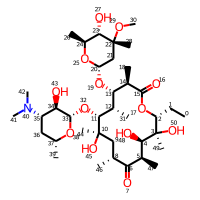

In [170]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
erythromycin = Chem.MolFromSmiles("CC[C@@H]1[C@@]([C@@H]([C@H](C(=O)[C@@H](C[C@@]([C@@H]([C@H]([C@@H]([C@H](C(=O)O1)C)O[C@H]2C[C@@]([C@H]([C@@H](O2)C)O)(C)OC)C)O[C@H]3[C@@H]([C@H](C[C@H](O3)C)N(C)C)O)(C)O)C)C)O)(C)O")
erythromycin

In [171]:
# Define SMARTS pattern with ring size > 12
# This is an RDKit SMARTS extension
macro = Chem.MolFromSmarts("[r{12-}]")
print(erythromycin.GetSubstructMatches(macro))

((2,), (3,), (4,), (5,), (6,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (17,))


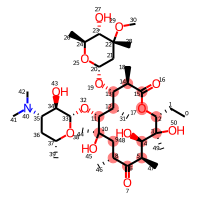

In [172]:
erythromycin

## 6.3.得到匹配子结构的SMILES式 Returning Substructure Matches as SMILES
**Author**: Andrew Dalke

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36735316/

**Index ID#**: RDKitCB_18

**Summary**: Obtain SMILES of the matched substructure.

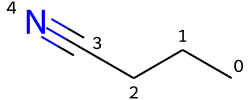

In [263]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.molSize = 250, 100
pat = Chem.MolFromSmarts("[NX1]#[CX2]") #matches nitrile
mol = Chem.MolFromSmiles("CCCC#N") # Butyronitrile
mol

In [177]:
atom_indices = mol.GetSubstructMatch(pat)
print(atom_indices)
print(Chem.MolFragmentToSmiles(mol, atom_indices)) # returns the nitrile

(4, 3)
C#N


In [183]:
# Note however that if only the atom indices are given then Chem.MolFragmentToSmiles() will include all bonds
# which connect those atoms, even if the original SMARTS does not match those bonds. For example:
pat = Chem.MolFromSmarts("*~*~*~*") # match 4 linear atoms
mol = Chem.MolFromSmiles("C1CCC1") # ring of size 4
atom_indices = mol.GetSubstructMatch(pat)
print(atom_indices)

(0, 1, 2, 3)


In [179]:
print(Chem.MolFragmentToSmiles(mol, atom_indices))  # returns the ring

C1CCC1


In [180]:
# If this is important, then you need to pass the correct bond indices to MolFragmentToSmiles().
# This can be done by using the bonds in the query graph to get the bond indices in the molecule graph.
def get_match_bond_indices(query, mol, match_atom_indices):
  bond_indices = []
  for query_bond in query.GetBonds():
    atom_index1 = match_atom_indices[query_bond.GetBeginAtomIdx()]
    atom_index2 = match_atom_indices[query_bond.GetEndAtomIdx()]
    bond_indices.append(mol.GetBondBetweenAtoms(
        atom_index1, atom_index2).GetIdx())
  return bond_indices

In [184]:
# return the bond indices of matched substructure
bond_indices = get_match_bond_indices(pat, mol, atom_indices)
print(bond_indices)

[0, 1, 2]


In [185]:
print(Chem.MolFragmentToSmiles(mol, atom_indices, bond_indices))

CCCC


## 6.4.在片段内匹配模式 Within the Same Fragment
**Author**: Greg Landrum

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36942946/

**Index ID**#: RDKitCB_20

**Summary**: Match a pattern only within the same fragment.

In [191]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False

In [192]:
p = Chem.MolFromSmarts('O.N')

In [193]:
# define a function where matches are contained in a single fragment
def fragsearch(m,p):
  matches = [set(x) for x in m.GetSubstructMatches(p)]
  frags = [set(y) for y in Chem.GetMolFrags(m)] # had to add this line for code to work
  for frag in frags:
    for match in matches:
      if match.issubset(frag):
        return match
  return False

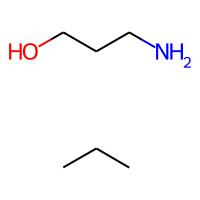

In [198]:
m1 = Chem.MolFromSmiles('OCCCN.CCC')
m1

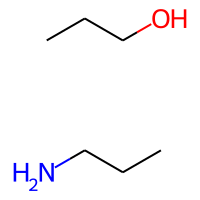

In [199]:
m2 = Chem.MolFromSmiles('OCCC.CCCN')
m2

In [200]:
print(m1.HasSubstructMatch(p))

True


In [201]:
print(m2.HasSubstructMatch(p))

True


In [204]:
# p 在 m2 的单个片段上
print(fragsearch(m1,p))

{0, 4}


In [205]:
# p 不在 m2 的单个片段上
print(fragsearch(m2,p))

False


# 7.描述符计算 Descriptor Calculations

## 7.1.Molecule Hash Strings

**Author**: Vincent Scalfani and Takayuki Serizawa

**Source**: https://gist.github.com/vfscalfani/f77d90f9f27e0f820b966882cdadccd0 and https://iwatobipen.wordpress.com/2019/10/27/a-new-function-of-rdkit201909-rdkit-chemoinformatics/

**Index ID#**: RDKitCB_21

**Summary**: Calculate hash strings for molecules with the NextMove MolHash functionality within RDKit.

Reference **Note**: Examples from O’Boyle and Sayle 2

In [224]:
from rdkit import Chem
from rdkit.Chem import rdMolHash
import rdkit
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.ipython_useSVG =  True

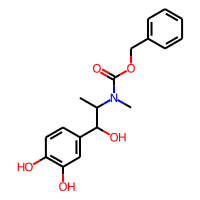

In [225]:
s = Chem.MolFromSmiles('CC(C(C1=CC(=C(C=C1)O)O)O)N(C)C(=O)OCC2=CC=CC=C2')
s

In [226]:
#  View all of the MolHash hashing functions types with the names method.
molhashf = rdMolHash.HashFunction.names
print(molhashf)

{'AnonymousGraph': rdkit.Chem.rdMolHash.HashFunction.AnonymousGraph, 'ElementGraph': rdkit.Chem.rdMolHash.HashFunction.ElementGraph, 'CanonicalSmiles': rdkit.Chem.rdMolHash.HashFunction.CanonicalSmiles, 'MurckoScaffold': rdkit.Chem.rdMolHash.HashFunction.MurckoScaffold, 'ExtendedMurcko': rdkit.Chem.rdMolHash.HashFunction.ExtendedMurcko, 'MolFormula': rdkit.Chem.rdMolHash.HashFunction.MolFormula, 'AtomBondCounts': rdkit.Chem.rdMolHash.HashFunction.AtomBondCounts, 'DegreeVector': rdkit.Chem.rdMolHash.HashFunction.DegreeVector, 'Mesomer': rdkit.Chem.rdMolHash.HashFunction.Mesomer, 'HetAtomTautomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomTautomer, 'HetAtomProtomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomProtomer, 'RedoxPair': rdkit.Chem.rdMolHash.HashFunction.RedoxPair, 'Regioisomer': rdkit.Chem.rdMolHash.HashFunction.Regioisomer, 'NetCharge': rdkit.Chem.rdMolHash.HashFunction.NetCharge, 'SmallWorldIndexBR': rdkit.Chem.rdMolHash.HashFunction.SmallWorldIndexBR, 'SmallWorldIndexBRL': r

In [227]:
# Generate MolHashes for molecule 's' with all defined hash functions.
for i, j in molhashf.items():
  print(i, rdMolHash.MolHash(s, j))

AnonymousGraph **(***1*****1)*(*)*(*)*(*)*1***(*)*(*)*1
ElementGraph CC(C(O)C1CCC(O)C(O)C1)N(C)C(O)OCC1CCCCC1
CanonicalSmiles CC(C(O)c1ccc(O)c(O)c1)N(C)C(=O)OCc1ccccc1
MurckoScaffold c1ccc(CCNCOCc2ccccc2)cc1
ExtendedMurcko *c1ccc(C(*)C(*)N(*)C(=*)OCc2ccccc2)cc1*
MolFormula C18H21NO5
AtomBondCounts 24,25
DegreeVector 0,8,10,6
Mesomer CC(C(O)[C]1[CH][CH][C](O)[C](O)[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1_0
HetAtomTautomer CC(C([O])[C]1[CH][CH][C]([O])[C]([O])[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1_3_0
HetAtomProtomer CC(C([O])[C]1[CH][CH][C]([O])[C]([O])[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1_3
RedoxPair CC(C(O)[C]1[CH][CH][C](O)[C](O)[CH]1)N(C)[C]([O])OC[C]1[CH][CH][CH][CH][CH]1
Regioisomer *C.*CCC.*O.*O.*O.*OC(=O)N(*)*.C.c1ccccc1.c1ccccc1
NetCharge 0
SmallWorldIndexBR B25R2
SmallWorldIndexBRL B25R2L10
ArthorSubstructureOrder 00180019010012000600009b000000


In [228]:
# Murcko Scaffold Hashes (from slide 16 in [ref2])
# Create a list of SMILES
mList = ['CCC1CC(CCC1=O)C(=O)C1=CC=CC(C)=C1','CCC1CC(CCC1=O)C(=O)C1=CC=CC=C1',\
         'CC(=C)C(C1=CC=CC=C1)S(=O)CC(N)=O','CC1=CC(=CC=C1)C(C1CCC(N)CC1)C(F)(F)F',\
         'CNC1CCC(C2=CC(Cl)=C(Cl)C=C2)C2=CC=CC=C12','CCCOC(C1CCCCC1)C1=CC=C(Cl)C=C1']

In [229]:
# Loop through the SMILES mList and create RDKit molecular objects
mMols = [Chem.MolFromSmiles(m) for m in mList]
# Calculate Murcko Scaffold Hashes
murckoHashList = [rdMolHash.MolHash(mMol, rdkit.Chem.rdMolHash.HashFunction.MurckoScaffold) for mMol in mMols]
print(murckoHashList)

['c1ccc(CC2CCCCC2)cc1', 'c1ccc(CC2CCCCC2)cc1', 'c1ccccc1', 'c1ccc(CC2CCCCC2)cc1', 'c1ccc(C2CCCc3ccccc32)cc1', 'c1ccc(CC2CCCCC2)cc1']


In [230]:
# Get the most frequent Murcko Scaffold Hash
def mostFreq(list):
  return max(set(list), key=list.count)
mostFreq_murckoHash = mostFreq(murckoHashList)
print(mostFreq_murckoHash)

c1ccc(CC2CCCCC2)cc1


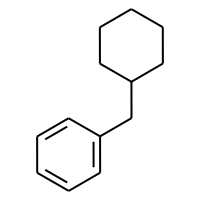

In [231]:
mostFreq_murckoHash_mol = Chem.MolFromSmiles('c1ccc(CC2CCCCC2)cc1')
mostFreq_murckoHash_mol

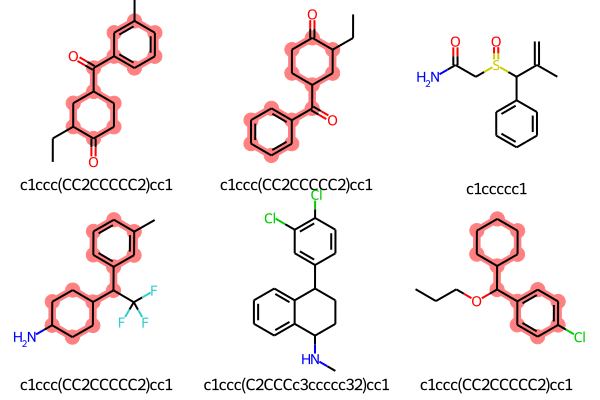

In [232]:
# Display molecules with MurkoHash as legends and highlight the mostFreq_murckoHash
highlight_mostFreq_murckoHash = [mMol.GetSubstructMatch(mostFreq_murckoHash_mol) for mMol in mMols]
Draw.MolsToGridImage(mMols,legends=[murckoHash for murckoHash in murckoHashList],
                     highlightAtomLists = highlight_mostFreq_murckoHash,
                     subImgSize=(200,200), useSVG=False)

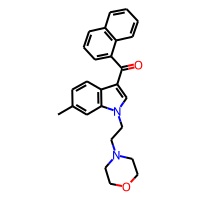

In [233]:
# Regioisomer Hashes (from slide 17 in [ref2])
# Find Regioisomer matches for this molecule
r0 = Chem.MolFromSmiles('CC1=CC2=C(C=C1)C(=CN2CCN1CCOCC1)C(=O)C1=CC=CC2=C1C=CC=C2')
r0

In [234]:
# Calculate the regioisomer hash for r0
r0_regioHash = rdMolHash.MolHash(r0,rdkit.Chem.rdMolHash.HashFunction.Regioisomer)
print(r0_regioHash)

*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1


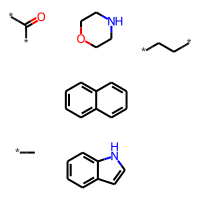

In [235]:
r0_regioHash_mol = Chem.MolFromSmiles('*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1')
r0_regioHash_mol

In [236]:
# Create a list of SMILES
rList = ['CC1=CC2=C(C=C1)C(=CN2CCN1CCOCC1)C(=O)C1=CC=CC2=C1C=CC=C2',\
        'CCCCCN1C=C(C2=CC=CC=C21)C(=O)C3=CC=CC4=CC=CC=C43',\
        'CC1COCCN1CCN1C=C(C(=O)C2=CC=CC3=C2C=CC=C3)C2=C1C=CC=C2',\
         'CC1=CC=C(C(=O)C2=CN(CCN3CCOCC3)C3=C2C=CC=C3)C2=C1C=CC=C2',\
        'CC1=C(CCN2CCOCC2)C2=C(C=CC=C2)N1C(=O)C1=CC=CC2=CC=CC=C12',\
        'CN1CCN(C(C1)CN2C=C(C3=CC=CC=C32)C(=O)C4=CC=CC5=CC=CC=C54)C']
# Loop through the SMILES rList and create RDKit molecular objects
rMols = [Chem.MolFromSmiles(r) for r in rList]

In [237]:
# Calculate Regioisomer Hashes
regioHashList = [rdMolHash.MolHash(rMol, rdkit.Chem.rdMolHash.HashFunction.Regioisomer) for rMol in rMols]
print(regioHashList)

['*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1', '*C(*)=O.*CCCCC.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1', '*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1', '*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1', '*C.*C(*)=O.*CC*.C1COCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1', '*C.*C.*C(*)=O.*C*.C1CNCCN1.c1ccc2[nH]ccc2c1.c1ccc2ccccc2c1']


In [238]:
rmatches =[]
for regioHash in regioHashList:
  if regioHash == r0_regioHash:
    print('Regioisomer: True')
    rmatches.append('Regioisomer: True')
  else:
    print('Regioisomer: False')
    rmatches.append('Regioisomer: False')

Regioisomer: True
Regioisomer: False
Regioisomer: True
Regioisomer: True
Regioisomer: True
Regioisomer: False


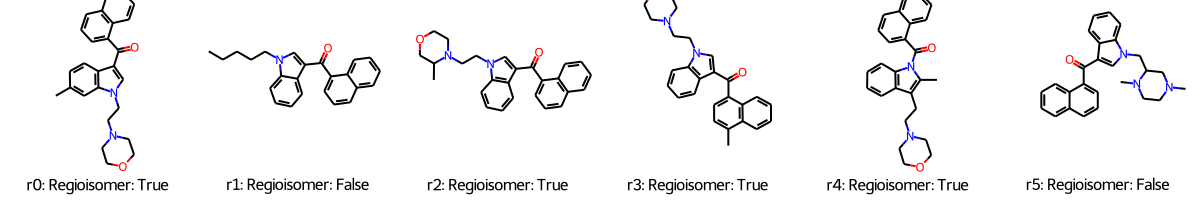

In [244]:
# Create some labels
index = ['r0: ','r1: ','r2: ','r3: ','r4: ','r5: ']
labelList = [rmatches + index for rmatches,index in zip(index,rmatches)]
# Display molecules with labels
Draw.MolsToGridImage(rMols,legends=[label for label in labelList],
                    subImgSize=(200,200), useSVG=True, molsPerRow = 6)
# note, that r0 is the initial molecule we were interested in.

## 7.3.计算邻近的可旋转键的最大数目 Contiguous Rotable Bonds
**Author**: Paulo Tosco

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36405144/

**Index ID# **: RDKitCB_22

**Summary**: Calculate the largest number of contiguous rotable bonds.

In [264]:
from rdkit import Chem
from rdkit.Chem.Lipinski import RotatableBondSmarts
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.ipython_useSVG =  True
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300, 100

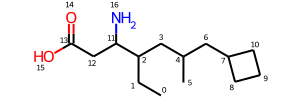

In [265]:
mol = Chem.MolFromSmiles('CCC(CC(C)CC1CCC1)C(CC(=O)O)N')
mol

In [266]:
def find_bond_groups(mol):
  """Find groups of contiguous rotatable bonds and return them sorted by decreasing size"""
  rot_atom_pairs = mol.GetSubstructMatches(RotatableBondSmarts)
  rot_bond_set = set([mol.GetBondBetweenAtoms(*ap).GetIdx() for ap in rot_atom_pairs])
  rot_bond_groups = []
  while (rot_bond_set):
    i = rot_bond_set.pop()
    connected_bond_set = set([i])
    stack = [i]
    while (stack):
      i = stack.pop()
      b = mol.GetBondWithIdx(i)
      bonds = []
      for a in (b.GetBeginAtom(), b.GetEndAtom()):
        bonds.extend([b.GetIdx() for b in a.GetBonds() if (
          (b.GetIdx() in rot_bond_set) and (not (b.GetIdx() in connected_bond_set)))])
      connected_bond_set.update(bonds)
      stack.extend(bonds)
    rot_bond_set.difference_update(connected_bond_set)
    rot_bond_groups.append(tuple(connected_bond_set))
  return tuple(sorted(rot_bond_groups, reverse = True, key = lambda x: len(x)))

In [267]:
# Find groups of contiguous rotatable bonds in mol
bond_groups = find_bond_groups(mol)
# As bond groups are sorted by decreasing size, the size of the first group (if any)
# is the largest number of contiguous rotatable bonds in mol
largest_n_cont_rot_bonds = len(bond_groups[0]) if bond_groups else 0

In [268]:
print(largest_n_cont_rot_bonds)

8


In [269]:
print(bond_groups)

((1, 2, 3, 5, 6, 10, 11, 12),)


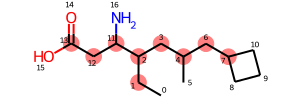

In [270]:
mol

# 8.写分子 Wrting Molecules

## 8.1.写出苯环分子的Kekule SMILES
**Author**: Paulo Tosco

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36893087/

**Index ID#**: RDKitCB_4

**Summary**: Kekulize a molecule and write Kekule SMILES

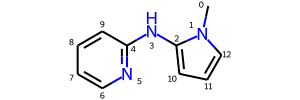

In [274]:
from rdkit import Chem
smi = "CN1C(NC2=NC=CC=C2)=CC=C1"
mol = Chem.MolFromSmiles(smi)
mol

In [276]:
print(Chem.MolToSmiles(mol))

Cn1cccc1Nc1ncccc1


In [277]:
Chem.Kekulize(mol)
print(Chem.MolToSmiles(mol, kekuleSmiles=True))

CN1C=CC=C1NC1=NC=CC=C1


## 8.2.不含同位素的同分异构体 someric SMILES without isotopes
**Author**: Andrew Dalke

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36877847/

**Index ID#**: RDKitCB_5

**Summary**: Write Isomeric SMILES without isotope information (i.e., only stereochemistry)

In [279]:
from rdkit import Chem
def MolWithoutIsotopesToSmiles(mol):
   atom_data = [(atom, atom.GetIsotope()) for atom in mol.GetAtoms()]
   for atom, isotope in atom_data:
   # restore original isotope values
       if isotope:
           atom.SetIsotope(0)
   smiles = Chem.MolToSmiles(mol)
   for atom, isotope in atom_data:
       if isotope:
          atom.SetIsotope(isotope)
   return smiles

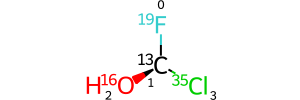

In [282]:
mol = Chem.MolFromSmiles("[19F][13C@H]([16OH])[35Cl]")
mol

In [283]:
print(MolWithoutIsotopesToSmiles(mol))

O[C@@H](F)Cl


N.B. There are **two limitations** noted with this Isomeric SMILES without isotopes method including with isotopic hydrogens, and a requirement to recalculate stereochemistry. See the source discussion linked above for further explanation and examples.

# 9.反应 Reactions

## 9.1.逆合成，将产物分解反应物为Reversing Reactions
**Author**: Greg Landrum

**Source**: https://gist.github.com/greglandrum/5ca4eebbe78f4d6d9b8cb03f401ad9cd and https://sourceforge.net/p/rdkit/mailman/message/36867857/

**Index ID#**: RDKitCB_6

**Summary**: Decompose a reaction product into its reactants

**Reference Note**: Example reaction from Hartenfeller 1

In [310]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.useSVG = True
IPythonConsole.molSize = 500,100

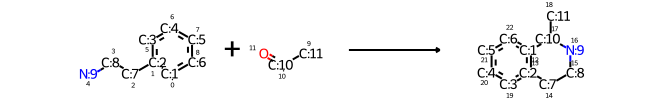

In [312]:
# Pictet-Spengler rxn （Here, we can find adding number modifiers after :）
rxn = AllChem.ReactionFromSmarts('[cH1:1]1:[c:2](-[CH2:7]-[CH2:8]-[NH2:9]):[c:3]:[c:4]:[c:5]:[c:6]:1.[#6:11]-[CH1;R0:10]=[OD1]>>[c:1]12:[c:2](-[CH2:7]-[CH2:8]-[NH1:9]-[C:10]-2(-[#6:11])):[c:3]:[c:4]:[c:5]:[c:6]:1')
rxn

In [313]:
rxn2 = AllChem.ChemicalReaction()
for i in range(rxn.GetNumReactantTemplates()):
  rxn2.AddProductTemplate(rxn.GetReactantTemplate(i))
for i in range(rxn.GetNumProductTemplates()):
  rxn2.AddReactantTemplate(rxn.GetProductTemplate(i))
rxn2.Initialize()

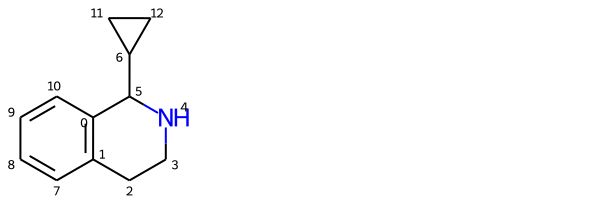

In [314]:
reacts = [Chem.MolFromSmiles(x) for x in ('NCCc1ccccc1','C1CC1C(=O)')]
ps = rxn.RunReactants(reacts)
ps0 = ps[0]
for p in ps0:
  Chem.SanitizeMol(p)
Draw.MolsToGridImage(ps0)

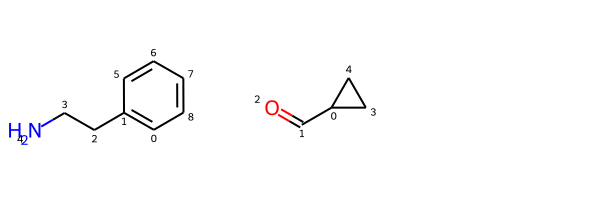

In [316]:
reacts = ps0
rps = rxn2.RunReactants(reacts)
rps0 = rps[0]
for rp in rps0:
  Chem.SanitizeMol(rp)
Draw.MolsToGridImage(rps0)

N.B. This approach **isn’t perfect** and **won’t work for every reaction**. Reactions that include extensive query information in the original reactants are very likely to be **problematic**.

## 9.2.构造反应指纹，计算反应相似性 Reaction Fingerprints and Similarity
**Author**: Greg Landrum

**Source**: https://sourceforge.net/p/rdkit/mailman/message/37034626/

**Index ID#**: RDKitCB_27

**Summary**: Construct a reaction fingerprint and compute similarity

**Reference Note**: Reaction fingerprinting algorithm 6

In [317]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem import DataStructs

In [326]:
# construct the chemical reactions
rxn1 = rdChemReactions.ReactionFromSmarts('CCCO>>CCC=O')
rxn2 = rdChemReactions.ReactionFromSmarts('CC(O)C>>CC(=O)C')
rxn3 = rdChemReactions.ReactionFromSmarts('NCCO>>NCC=O')

# construct difference fingerprint (subtracts reactant fingerprint from product)
fp1 = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn1)
fp2 = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn2)
fp3 = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn3)

print(DataStructs.TanimotoSimilarity(fp1,fp2))

0.0


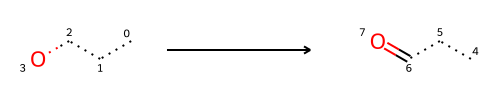

In [322]:
rxn1

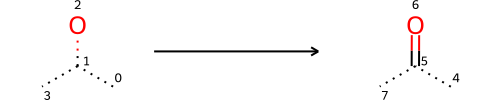

In [323]:
rxn2

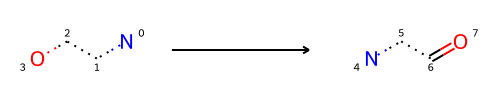

In [324]:
rxn3

In [319]:
# The similarity between fp1 and fp2 is zero because as far as the reaction
# fingerprint is concerned, the parts which change within the reactions have
# nothing in common with each other.
# In contrast, fp1 and fp3 have some common parts
print(DataStructs.TanimotoSimilarity(fp1,fp3))

0.42857142857142855


# 10.错误信息 Error Messages

## 10.1.跳过价键错误 Explicit Valence Error - Partial Sanitization
**Author**: Greg Landrum

**Source**: https://sourceforge.net/p/rdkit/mailman/message/32599798/

**Index** ID#: RDKitCB_15

**Summary**: Create a mol object with skipping valence check, followed by a partial sanitization. N.B. Use caution, and make sure your molecules actually make sense before doing this!

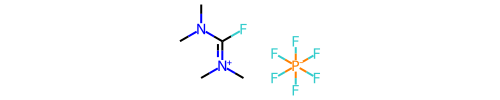

In [331]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False

# default RDKit behavior is to reject hypervalent P, so you need to set sanitize=False
m = Chem.MolFromSmiles('F[P-](F)(F)(F)(F)F.CN(C)C(F)=[N+](C)C',sanitize=False)
m

In [332]:
# next, you probably want to at least do a partial sanitization so that the molecule is actually useful:
m.UpdatePropertyCache(strict=False)
Chem.SanitizeMol(m,Chem.SanitizeFlags.SANITIZE_FINDRADICALS|Chem.SanitizeFlags.SANITIZE_KEKULIZE|Chem.SanitizeFlags.SANITIZE_SETAROMATICITY|Chem.SanitizeFlags.SANITIZE_SETCONJUGATION|Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION|Chem.SanitizeFlags.SANITIZE_SYMMRINGS,catchErrors=True)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

## 10.2.识别捕获化学问题 Detect Chemistry Problems
**Author**: Greg Landrum

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36779572/

**Index ID#**: RDKitCB_14

**Summary**: Identify and capture error messages when creating mol objects.

In [340]:
from rdkit import Chem

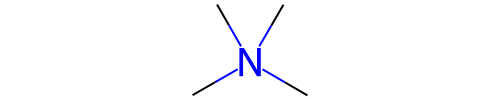

In [342]:
# Example1
m = Chem.MolFromSmiles('CN(C)(C)C', sanitize=False)
m

In [343]:
problems = Chem.DetectChemistryProblems(m)
print(len(problems))

1


RDKit ERROR: [14:36:50] Explicit valence for atom # 1 N, 4, is greater than permitted


In [344]:
print(problems[0].GetType())
print(problems[0].GetAtomIdx())
print(problems[0].Message())

AtomValenceException
1
Explicit valence for atom # 1 N, 4, is greater than permitted


In [345]:
# Example2
m2 = Chem.MolFromSmiles('c1cncc1',sanitize=False)
problems = Chem.DetectChemistryProblems(m2)
print(len(problems))

1


RDKit ERROR: [14:36:52] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 


# 11.模糊概念区分 Miscellaneous Topics

## 11.1.计算一个原子上的显性价键数、显性/隐性氢的数量、氢的总数 Explicit Valence and Number of Hydrogens

**Author**: Michael Palmer and Greg Landrum

**Source**: https://sourceforge.net/p/rdkit/mailman/message/29679834/

**Index ID#**: RDKitCB_11

**Summary**: Calculate the explicit valence, number of explicit and implicit hydrogens, and total number of hydrogens on an atom. See the link for an important explanation about terminology and implementation of these methods in RDKit. Highlights are presented below.

Most of the time (exception is explained below), explicit refers to atoms that are in the graph and implicit refers to atoms that are not in the graph (i.e., Hydrogens). So given that the ring is aromatic (e.g.,in pyrrole), the explicit valence of each of the atoms (ignoring the Hs that are not present in the graph) in pyrrole is 3. If you want the Hydrogen count, use GetTotalNumHs(); the total number of Hs for each atom is one:

In [358]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 60,60

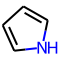

In [360]:
pyrrole = Chem.MolFromSmiles('C1=CNC=C1')
pyrrole

In [362]:
for atom in pyrrole.GetAtoms():
  print(atom.GetSymbol(), atom.GetExplicitValence(), atom.GetTotalNumHs())
# 大多数情况下，显性原子是指图中的原子，隐性原子是指不在图中的原子（即氢）。
# 因此，鉴于环是芳香族的（例如吡咯），吡咯中每个原子的显性价（忽略不存在于图形中的氢）是3。

C 3 1
C 3 1
N 3 1
C 3 1
C 3 1


In RDKit, there is overlapping nomenclature around the use of the words “explicit” and “implicit” when it comes to Hydrogens. When you specify the Hydrogens for an atom inside of square brackets in the SMILES, it becomes an “explicit” hydrogen as far as **atom.GetNumExplicitHs()** is concerned. Here is an example:

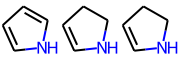

In [356]:
pyrrole = Chem.MolFromSmiles('C1=CNC=C1')
mol1 = Chem.MolFromSmiles('C1=CNCC1')
mol2 = Chem.MolFromSmiles('C1=C[NH]CC1')

Draw.MolsToGridImage((pyrrole, mol1, mol2), subImgSize=(60,60))

In [363]:
for atom in pyrrole.GetAtoms():
  print(atom.GetSymbol(), atom.GetExplicitValence(), atom.GetNumImplicitHs(), atom.GetNumExplicitHs(), atom.GetTotalNumHs())

C 3 1 0 1
C 3 1 0 1
N 3 0 1 1
C 3 1 0 1
C 3 1 0 1


In [364]:
for atom in mol1.GetAtoms():
  print(atom.GetSymbol(), atom.GetExplicitValence(), atom.GetNumImplicitHs(), atom.GetNumExplicitHs(), atom.GetTotalNumHs())

C 3 1 0 1
C 3 1 0 1
N 2 1 0 1
C 2 2 0 2
C 2 2 0 2


In [365]:
for atom in mol1.GetAtoms():
  print(atom.GetSymbol(), atom.GetExplicitValence(), atom.GetNumImplicitHs(), atom.GetNumExplicitHs(), atom.GetTotalNumHs())

C 3 1 0 1
C 3 1 0 1
N 2 1 0 1
C 2 2 0 2
C 2 2 0 2


## 11.2.计算 Wiener Index （一种分子的拓扑索引）
**Author**: Greg Landrum

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36802142/

**Index ID#**: RDKitCB_12

**Summary**: Calculate the Wiener index (a topological index of a molecule)

In [366]:
from rdkit import Chem
def wiener_index(m):
  res = 0
  amat = Chem.GetDistanceMatrix(m)
  num_atoms = m.GetNumAtoms()
  for i in range(num_atoms):
    for j in range(i+1,num_atoms):
      res += amat[i][j]
  return res

In [367]:
butane = Chem.MolFromSmiles('CCCC')
print(wiener_index(butane))

10.0


In [368]:
isobutane = Chem.MolFromSmiles('CC(C)C')
print(wiener_index(isobutane))

9.0


## 11.3.通过检测金属间的单键并以双键替代来加工有机金属SMILES Organometallics with Dative Bonds
**Author**: Greg Landrum

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36727044/ and https://gist.github.com/greglandrum/6cd7aadcdedb1ebcafa9537e8a47e3a4

**Index ID#**: RDKitCB_19

**Summary**: Process organometallic SMILES by detecting single bonds between metals and replacing with dative bonds.

In [369]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [370]:
def is_transition_metal(at):
  n = at.GetAtomicNum()
  return (n>=22 and n<=29) or (n>=40 and n<=47) or (n>=72 and n<=79)
def set_dative_bonds(mol, fromAtoms=(7,8)):
  """ convert some bonds to dative

  Replaces some single bonds between metals and atoms with atomic numbers in fomAtoms
  with dative bonds. The replacement is only done if the atom has "too many" bonds.

  Returns the modified molecule.

  """
  pt = Chem.GetPeriodicTable()
  rwmol = Chem.RWMol(mol)
  rwmol.UpdatePropertyCache(strict=False)
  metals = [at for at in rwmol.GetAtoms() if is_transition_metal(at)]
  for metal in metals:
    for nbr in metal.GetNeighbors():
      if nbr.GetAtomicNum() in fromAtoms and \
        nbr.GetExplicitValence()>pt.GetDefaultValence(nbr.GetAtomicNum()) and \
        rwmol.GetBondBetweenAtoms(nbr.GetIdx(),metal.GetIdx()).GetBondType() == Chem.BondType.SINGLE:
        rwmol.RemoveBond(nbr.GetIdx(),metal.GetIdx())
        rwmol.AddBond(nbr.GetIdx(),metal.GetIdx(),Chem.BondType.DATIVE)
  return rwmol

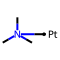

In [371]:
m = Chem.MolFromSmiles('CN(C)(C)[Pt]', sanitize=False)
m2 = set_dative_bonds(m)
m2

In [372]:
# we can check the bond between nitrogen and platinum
print(m2.GetBondBetweenAtoms(1,4).GetBondType())

DATIVE


In [373]:
# It also shows up in the output SMILES
# This is an RDKit extension to SMILES
print(Chem.MolToSmiles(m2))

CN(C)(C)->[Pt]


## 11.4. 列举分子的随机SMILES  Enumerate SMILES

**Author**: Guillaume Godin and Greg Landrum

**Source**: https://sourceforge.net/p/rdkit/mailman/message/36591616/ and https://github.com/rdkit/UGM_2020/blob/master/Notebooks/Landrum_WhatsNew.ipynb

**Index ID#**: RDKitCB_24

**Summary**: Enumerate variations of SMILES strings for the same molecule.

In [374]:
from rdkit import Chem

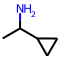

In [375]:
# create a mol object
mol = Chem.MolFromSmiles('CC(N)C1CC1')
mol

In [376]:
# Generate 100 random SMILES
smis = []
for i in range(100):
  smis.append(Chem.MolToSmiles(mol,doRandom=True,canonical=False))

In [381]:
# remove duplicates
smis_set = list(set(smis))
print(smis_set) # output order will be random; doctest skipped

['CC(N)C1CC1', 'C(C)(N)C1CC1', 'C(N)(C1CC1)C', 'C(N)(C)C1CC1', 'CC(C1CC1)N', 'C1(CC1)C(N)C', 'C1(C(C)N)CC1', 'C1C(C(C)N)C1', 'C(C)(C1CC1)N', 'C1(CC1)C(C)N', 'C1CC1C(N)C', 'C1C(C1)C(C)N', 'NC(C)C1CC1', 'C1C(C(N)C)C1', 'C(C1CC1)(C)N', 'C1C(C1)C(N)C', 'NC(C1CC1)C', 'C1(C(N)C)CC1', 'C1CC1C(C)N', 'C(C1CC1)(N)C']


In [382]:
# If you need the multiple random SMILES strings to be reproducible,
# the 2020.09 release has an option for this:
m = Chem.MolFromSmiles('Oc1ncc(OC(CC)C)cc1')
print(Chem.MolToRandomSmilesVect(m,5))  # output order random; doctest skipped

['O(C(C)CC)c1cnc(cc1)O', 'O(C(CC)C)c1cnc(cc1)O', 'c1(ncc(OC(CC)C)cc1)O', 'c1c(OC(C)CC)cnc(O)c1', 'CCC(C)Oc1cnc(O)cc1']


In [384]:
# by default the results are not reproducible:
print(Chem.MolToRandomSmilesVect(m,5)) # output order random; doctest skipped

['CC(CC)Oc1cnc(cc1)O', 'c1(ccc(O)nc1)OC(CC)C', 'c1nc(O)ccc1OC(C)CC', 'CC(CC)Oc1cnc(O)cc1', 'Oc1ncc(cc1)OC(CC)C']


In [385]:
# But we can provide a random number seed:
m = Chem.MolFromSmiles('Oc1ncc(OC(CC)C)cc1')
s1 = Chem.MolToRandomSmilesVect(m,5,randomSeed=0xf00d)
print(s1)

['Oc1ccc(OC(CC)C)cn1', 'CC(CC)Oc1cnc(O)cc1', 'c1(O)ncc(cc1)OC(C)CC', 'c1cc(cnc1O)OC(CC)C', 'c1c(OC(CC)C)cnc(c1)O']


In [386]:
s2 = Chem.MolToRandomSmilesVect(m,5,randomSeed=0xf00d)
print(s2 == s1)

True


## 11.5.创建一个独立于输入的标准原子顺序 Reorder Atoms （Canonical order）

**Author**: Jeffrey Van Santen and Paolo Tosco

**Source**: https://sourceforge.net/p/rdkit/mailman/message/37085522/ and https://gist.github.com/ptosco/36574d7f025a932bc1b8db221903a8d2

**Index ID#**: RDKitCB_28

**Summary**: Create a canonical order of atoms independent of input.

In [387]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

In [388]:
m = Chem.MolFromSmiles("c1([C@H](C)CC)cccc2ccccc12")
m1 = Chem.MolFromSmiles("c12ccccc1c(ccc2)[C@H](C)CC")
print(Chem.MolToSmiles(m) == Chem.MolToSmiles(m1))

True


In [389]:
# check if current canonical atom ordering matches
m_neworder = tuple(zip(*sorted([(j, i) for i, j in enumerate(Chem.CanonicalRankAtoms(m))])))[1]
m1_neworder = tuple(zip(*sorted([(j, i) for i, j in enumerate(Chem.CanonicalRankAtoms(m1))])))[1]
print(m_neworder == m1_neworder)

False


In [390]:
# add atom numbers in images
def addAtomIndices(mol):
  for i, a in enumerate(mol.GetAtoms()):
    a.SetAtomMapNum(i)

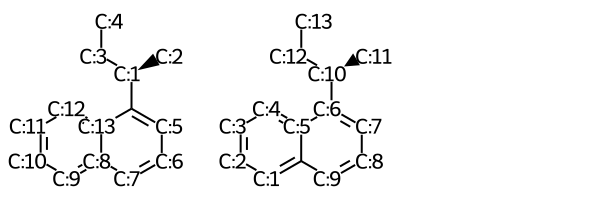

In [391]:
addAtomIndices(m)
addAtomIndices(m1)
MolsToGridImage((m, m1))

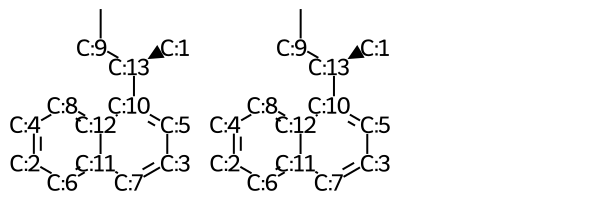

In [392]:
# renumber atoms with same canonical ordering
m_renum = Chem.RenumberAtoms(m, m_neworder)
m1_renum = Chem.RenumberAtoms(m1, m1_neworder)
addAtomIndices(m_renum)
addAtomIndices(m1_renum)
MolsToGridImage((m_renum, m1_renum))

## 11.6.Conformer Generation with ETKDG
**Author**: Shuzhe Wang

**Source**: Direct contribution to Cookbook

**Index ID#**: RDKitCB_25

**Summary**: Showcase various tricks for conformer generation with ETKDG

In [393]:
from rdkit import Chem
from rdkit.Chem import AllChem

To yield more chemically meaningful conformers, Riniker and Landrum implemented the experimental torsion knowledge distance geometry (ETKDG) method 3 which uses torsion angle preferences from the Cambridge Structural Database (CSD) to correct the conformers after distance geometry has been used to generate them. The configs of various conformer generation options are stored in a EmbedParameter object. To explicitly call the ETKDG EmbedParameter object:

In [394]:
params = AllChem.ETKDG()

At the moment this is the default conformer generation routine in RDKit. A newer set of torsion angle potentials were published in 2016 4, to use these instead:

In [395]:
params = AllChem.ETKDGv2()

In 2020, we devised some improvements to the ETKDG method for sampling small rings and macrocycles 5.

In [396]:
# this includes addtional small ring torsion potentials
params = AllChem.srETKDGv3()

# this includes additional macrocycle ring torsion potentials and macrocycle-specific handles
params = AllChem.ETKDGv3()

# to use the two in conjunction, do:
params = AllChem.ETKDGv3()
params.useSmallRingTorsions = True

# a macrocycle attached to a small ring
mol = Chem.MolFromSmiles("C(OC(CCCCCCC(OCCSC(CCCCCC1)=O)=O)OCCSC1=O)N1CCOCC1")
mol = Chem.AddHs(mol)
AllChem.EmbedMultipleConfs(mol, numConfs = 3 , params = params)

One additional tool we used in the paper is changing the bounds matrix of a molecule during distance geometry. The following code modifies the default molecular bounds matrix, with the idea of confining the conformational space of the molecule:

In [397]:
from rdkit.Chem import rdDistGeom
import rdkit.DistanceGeometry as DG

mol = Chem.MolFromSmiles("C1CCC1C")
mol = Chem.AddHs(mol)
bm = rdDistGeom.GetMoleculeBoundsMatrix(mol)
bm[0,3] = 1.21
bm[3,0] = 1.20
bm[2,3] = 1.21
bm[3,2] = 1.20
bm[4,3] = 1.21
bm[3,4] = 1.20
DG.DoTriangleSmoothing(bm)

params.SetBoundsMat(bm)

Another tool we introduced is setting custom pairwise Coulombic interactions (CPCIs), which mimics additional electrostatic interactions between atom pairs to refine the embedded conformers. The setter takes in a dictionary of integer tuples as keys and reals as values. The following one-liner sets a repulsive (+ve) interaction of strength 0.9 e^2 between the atom indexed 0 and indexed 3, with the idea of keeping these two atoms further apart.

In [398]:
params.SetCPCI({ (0,3) : 0.9 } )

To use the EmbedParameter for conformer generation:

In [399]:
params.useRandomCoords = True
# Note this is only an illustrative example, hydrogens are not added before conformer generation to keep the indices apparant
AllChem.EmbedMultipleConfs(mol, numConfs = 3 , params = params)

Both of these setters can be used to help sampling all kinds of molecules as the users see fit. Nevertheless, to facilitate using them in conformer generation of macrocycles, we devised the python package github.com/rinikerlab/cpeptools to provide chemcially intuitive bound matrices and CPCIs for macrocycles. Example usage cases are shown in the README.

# References

1
Hartenfeller, M.; Eberle, M.; Meier,P.; Nieto-Oberhuber, C.; Altmann, K.-H.; Schneider, G.; Jacoby, E.; and Renner, S. A Collection of Robust Organic Synthesis Reactions for In Silico Molecule Design. J. Chem Inf. Model. 2011, 51(12), 3093-3098. https://pubs.acs.org/doi/10.1021/ci200379p

2
O’Boyle, N. and Sayle, R. Making a hash of it: the advantage of selectively leaving out structural information. 259th ACS National Meeting Presentation, 2019, San Diego, CA. https://www.nextmovesoftware.com/talks/OBoyle_MolHash_ACS_201908.pdf

3
Riniker, S.; Landrum, G. A. Better Informed Distance Geometry: Using What We Know To Improve Conformation Generation. J. Chem. Inf. Model. 2015, 55(12), 2562-74. https://doi.org/10.1021/acs.jcim.5b00654

4
Guba, M.; Meyder, A.; Rarrey, M.; Hert, J. Torsion Library Reloaded: A New Version of Expert-Derived SMARTS Rules for Assessing Conformations of Small Molecules. J. Chem. Inf. Model. 2016, 56(1), 1-5. https://pubs.acs.org/doi/10.1021/acs.jcim.5b00522

5
Wang, S.; Witek, J.; Landrum, G. A.; Riniker, S. Improving Conformer Generation for Small Rings and Macrocycles Based on Distance Geometry and Experimental Torsional-Angle Preferences. J. Chem. Inf. Model. 2020, 60(4), 2044-2058. https://pubs.acs.org/doi/10.1021/acs.jcim.0c00025

6
Schneider, N.; Lowe, D.M.; Sayle, R.A.; Landrum, G. A. Development of a Novel Fingerprint for Chemical Reactions and Its Application to Large-Scale Reaction Classification and Similarity. J. Chem. Inf. Model. 2015, 55(1), 39-53. https://pubs.acs.org/doi/abs/10.1021/ci5006614